# Init

In [90]:
import sys
sys.path.append('../src')

from environments import LineEnv, GridEnv, MazeEnv
from policies import HardCodedAgent

import numpy as np

# Grid

In [91]:
env = GridEnv()
agent = HardCodedAgent(env)
value_function = agent.evaluate_policy()
print("Value Function:", value_function)

Value Function: [  0.          -7.55860372 -10.48587627 -11.38377519  -7.55860372
  -9.59194855 -10.53696679 -10.49293913 -10.48587627 -10.53696679
  -9.59779382  -7.56791637 -11.38377519 -10.49293913  -7.56791637
   0.        ]


In [92]:
env = GridEnv()
agent = HardCodedAgent(env)
agent.value_iteration()

print("Optimal Value Function:", agent.value_function)
print("Optimal Policy:", agent.policy)


Optimal Value Function: [ 0.     -1.     -1.95   -2.8525 -1.     -1.95   -2.8525 -1.95   -1.95
 -2.8525 -1.95   -1.     -2.8525 -1.95   -1.      0.    ]
Optimal Policy: [0 3 3 0 2 2 0 0 2 0 0 0 1 1 1 0]


# Maze

In [261]:
env = MazeEnv()
agent = HardCodedAgent(env)
value_function = agent.evaluate_policy()
print("Value Function:", value_function)

Value Function: [-19.84451684 -19.84797093 -19.8358753  -19.81300568 -19.84451684
 -19.84991095 -19.85765667 -19.86142441 -19.86113988 -19.77332157
 -19.79465002 -19.83874683 -19.54551498 -19.68580448 -19.81913187
 -19.78571999 -19.69024604 -19.55054228 -19.33529083 -19.82570494
 -18.78086734 -17.98410983 -16.77466618 -19.85084734 -19.85661
 -19.85318447 -19.86272239 -14.89529963 -19.86142319 -19.8680819
 -19.87048932  -7.30822042 -11.94776379 -19.86358875   0.        ]


In [265]:
agent.value_function

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [266]:
env = MazeEnv()
agent = HardCodedAgent(env, gamma=1)
agent.value_iteration()

print("Optimal Value Function:", agent.value_function)
print("Optimal Policy:", agent.policy)


Optimal Value Function: [-14. -13. -12. -11. -14. -13. -14. -15. -14. -10. -11. -12.  -8.  -9.
 -11. -10.  -9.  -8.  -7. -11.  -6.  -5.  -4. -14. -13. -12. -13.  -3.
 -14. -14. -15.  -1.  -2. -15.   0.]
Optimal Policy: [0 1 1 0 1 0 3 1 2 0 3 0 0 3 1 1 1 1 0 2 1 1 0 1 1 2 3 0 2 2 3 0 3 2 0]


# Graphify

In [267]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [268]:
import networkx as nx

In [269]:
# Initialize the environment
env = MazeEnv()

# Create a directed graph
G = nx.DiGraph()

# Add vertices (states) to the graph
for state in env._state_to_grid.keys():
    G.add_node(state)

# Add edges (actions) to the graph
for state in G.nodes:
    for action in range(4):  # There are four possible actions: up, right, down, left
        next_state, reward = env.get_next_state_and_reward(state, action)
        G.add_edge(state, next_state, weight=reward)

# Now G is the graph representation of the environment
G.nodes(), G.edges(data=True)


(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34)),
 OutEdgeDataView([(0, 5, {'weight': -1}), (0, 0, {'weight': -1}), (1, 8, {'weight': -1}), (1, 2, {'weight': -1}), (1, 1, {'weight': -1}), (2, 2, {'weight': -1}), (2, 3, {'weight': -1}), (2, 1, {'weight': -1}), (3, 9, {'weight': -1}), (3, 3, {'weight': -1}), (3, 2, {'weight': -1}), (4, 4, {'weight': -1}), (4, 5, {'weight': -1}), (5, 11, {'weight': -1}), (5, 6, {'weight': -1}), (5, 0, {'weight': -1}), (5, 4, {'weight': -1}), (6, 6, {'weight': -1}), (6, 7, {'weight': -1}), (6, 5, {'weight': -1}), (7, 7, {'weight': -1}), (7, 8, {'weight': -1}), (7, 6, {'weight': -1}), (8, 8, {'weight': -1}), (8, 1, {'weight': -1}), (8, 7, {'weight': -1}), (9, 13, {'weight': -1}), (9, 10, {'weight': -1}), (9, 3, {'weight': -1}), (9, 9, {'weight': -1}), (10, 10, {'weight': -1}), (10, 9, {'weight': -1}), (11, 14, {'weight': -1}), (11, 11, {'weight': -1}), (11, 5, {'wei

In [270]:
# G2 = G.to_undirected()
# # now remove edges from a node to itself if that edge exists
# for node in G2.nodes:
#     if (node, node) in G2.edges:
#         G2.remove_edge(node, node)

# node_values = {node: float(agent.value_function[node]) for node in G2.nodes}
# edge_values = {(u, v): max(node_values[u], node_values[v]) for u, v in G2.edges}


In [271]:
# print("dictionary with nodes as keys and function values as values")

# print(node_values)

# print("dictionary with edges as keys and function values as values")

# print(edge_values)

In [272]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define a Real-Valued Function on the Graph
# Assigning a random value to each node
node_values = {node: float(agent.value_function[node]) for node in G.nodes}
edge_values = {(u, v): max(node_values[u], node_values[v]) for u, v in G.edges}

# Adding the values as a node attribute
nx.set_node_attributes(G, node_values, "node_value")
nx.set_edge_attributes(G, edge_values, "edge_value")




/var/folders/yj/shxyd1mj4j16s48y00rbbj6r0000gn/T/ipykernel_13579/1637720778.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Node Values')


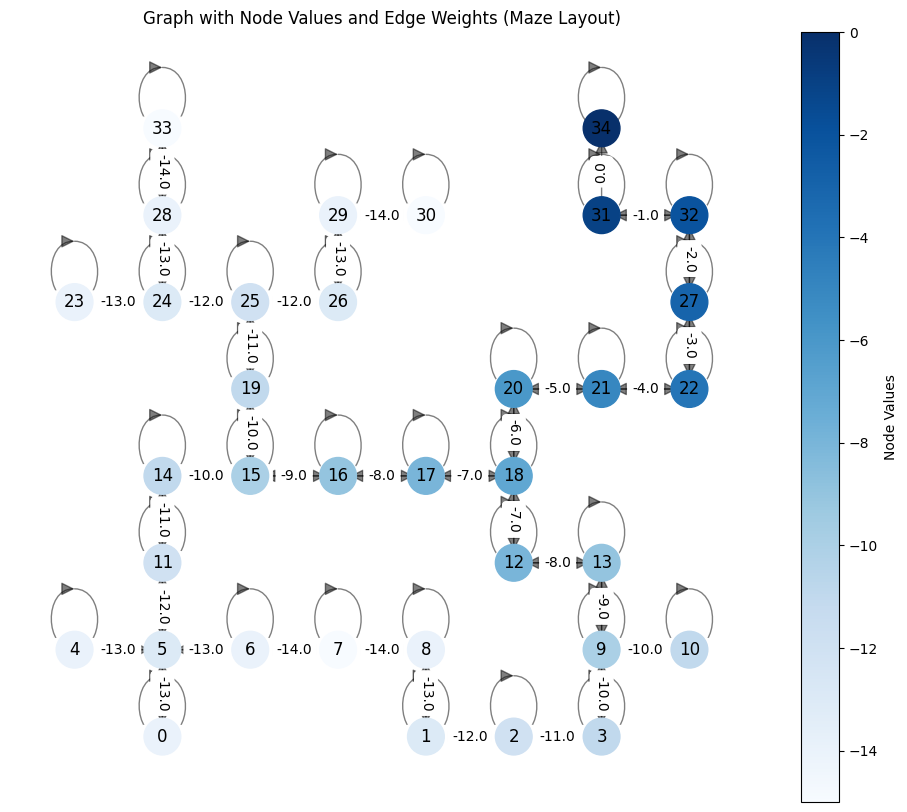

In [273]:
# Improve Visualization by Specifying Node Positions Based on Maze Grid
grid_positions = {state: (pos[0], pos[1]) for state, pos in env._state_to_grid.items()}
node_labels = {state: str(state) for state in G.nodes}

plt.figure(figsize=(12, 10))

# Nodes
nx.draw_networkx_nodes(G, pos=grid_positions, node_size=700, cmap=plt.cm.Blues, node_color=list(node_values.values()))
nx.draw_networkx_labels(G, pos=grid_positions, labels=node_labels)

# Edges
nx.draw_networkx_edges(G, pos=grid_positions, width=1.0, alpha=0.5, arrowsize=20, edge_color="black")

# Edge labels
edge_labels = {(i, j): f"{G[i][j]['edge_value']}" for i, j in G.edges}
nx.draw_networkx_edge_labels(G, pos=grid_positions, edge_labels=edge_labels)

# Color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_values.values()), vmax=max(node_values.values())))
sm.set_array([])
cbar = plt.colorbar(sm, label='Node Values')

# Title and layout
plt.title("Graph with Node Values and Edge Weights (Maze Layout)")
plt.axis('off')
plt.show()

In [274]:
# Convert to Undirected Graph and Compute Laplacian
G_undirected = G.to_undirected()
laplacian_matrix_undirected = nx.laplacian_matrix(G_undirected).toarray()
laplacian_matrix_undirected


array([[-1,  0,  0, ...,  0,  0,  0],
       [ 0, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -2,  0,  0],
       [ 0,  0,  0, ...,  0, -1,  0],
       [ 0,  0,  0, ...,  0,  0, -1]])

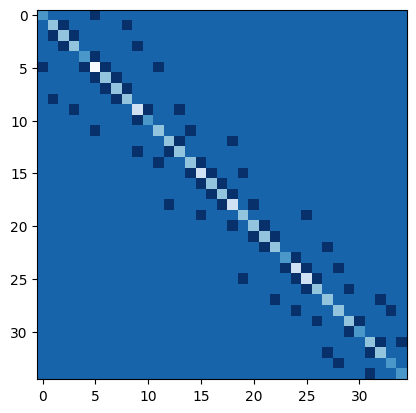

In [275]:
plt.imshow(laplacian_matrix_undirected, cmap='Blues')

# div grad curl

In [276]:
def grad(G, i, j):
    # return the gradient of the function, using the notion from graphs:
    # the function f is a 0-cochain (i.e. a function on the nodes)
    # the gradient of f is a 1-cochain (i.e. a function on the edges))
    
    # use both conditions?
    if j in G[i] or i in G[j]:
        return G.nodes[j]["node_value"] - G.nodes[i]["node_value"]
    else:
        return 0.

In [277]:
def curl(G, i, j, k):
    # TODO: should implement curl(X, i,j,k). This assumes X is whats' in G edge values
    # TODO: modify if we assume G is undirected
    # TODO: implement w_ij weights
    # first determine if i,j,k is in a clique:
    cliques = list(nx.find_cliques(G.to_undirected()))
    cliques = [set(c) for c in cliques if len(c) == 3]
    if set([i,j,k]) in cliques:
        Xij = ((i < j) * 2 - 1) * G[i][j]['edge_value']
        Xjk = ((j < k) * 2 - 1) * G[j][k]['edge_value']
        Xki = ((k < i) * 2 - 1) * G[k][i]['edge_value']
        return Xij + Xjk + Xki
    else:
        return 0.

In [278]:
def div(G, i):
    # again, assumes X is encoded in edge values...
    div = 0
    for j in G[i]:
        div +=  ((i < j) * 2 - 1) * G[i][j]['edge_value']
    return div

# TODO: hemholtz decomposition